In [10]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../../data/data_preprocessed.csv', index_col=None, sep=';')

In [7]:
### Разделим выборку на train-test
df = df.sort_values("time")

df_test_size = df.shape[0] // 5

In [11]:
df.drop(['time', 'user_id'], axis=1, inplace=True)

In [12]:
df_train = df.iloc[:-df_test_size].copy()
df_test = df.iloc[-df_test_size:].copy()

In [13]:
X_train = df_train.drop('action', axis=1)
X_test = df_test.drop('action', axis=1)

y_train = df_train['action']
y_test = df_test['action']

In [14]:
from catboost import CatBoostClassifier


catBoost = CatBoostClassifier(
    loss_function='Logloss',
    verbose=100
)

catBoost.fit(X_train, y_train)

Learning rate set to 0.220484
0:	learn: 0.5534147	total: 191ms	remaining: 3m 11s
100:	learn: 0.4321843	total: 8.74s	remaining: 1m 17s
200:	learn: 0.4312781	total: 18.9s	remaining: 1m 14s
300:	learn: 0.4305674	total: 29.7s	remaining: 1m 8s
400:	learn: 0.4299081	total: 40.6s	remaining: 1m
500:	learn: 0.4292560	total: 50s	remaining: 49.8s
600:	learn: 0.4286628	total: 59.6s	remaining: 39.5s
700:	learn: 0.4280765	total: 1m 8s	remaining: 29.4s
800:	learn: 0.4275266	total: 1m 17s	remaining: 19.2s
900:	learn: 0.4269871	total: 1m 25s	remaining: 9.4s
999:	learn: 0.4264704	total: 1m 33s	remaining: 0us


In [15]:
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

y_pred = catBoost.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.821     0.983     0.895    265549
           1      0.472     0.067     0.118     60837

    accuracy                          0.812    326386
   macro avg      0.646     0.525     0.506    326386
weighted avg      0.756     0.812     0.750    326386



In [16]:
fpr, tpr, thresholds = roc_curve(y_test, catBoost.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC_AUC = {roc_auc.round(3)}')

ROC_AUC = 0.722


Text(0.5, 1.0, 'Feature Importance')

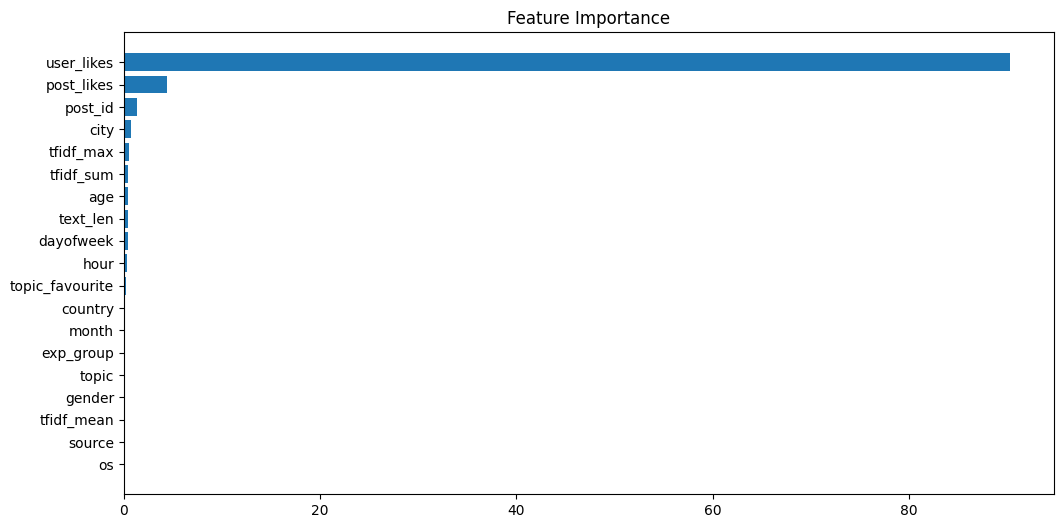

In [17]:
import matplotlib.pyplot as plt

feature_importance = catBoost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [19]:
catBoost.save_model('catBoost_classifier', format='cbm')